1. Bernstein-Vazirani problem is a special case of Deutsch-Josza problem. In Deutsch-Josza problem, we have a $n$-bit function $f$, such that $f:{\{0, 1\}^n} {\rightarrow} {0, 1}$, and we need to find if the function is constant or balanced. 

2. In Deutsch-Josza algorithm, we saw that if we measure only $|0>^{{\otimes}n}$, we had a constant function. If we measure any other state except $|0>^{{\otimes}n} state, then we had a balanced function but we did not figure the exact state. In Bernstein-Vazirani problem, we will figure out the particular state.

3. The state we had right before measure in Deutsch-Josza algorithm is $|\psi> = {\frac{1}{2^n}} {\sum_{z \in \{0, 1\}^n}} ({\sum_{x \in \{0, 1\}^n}} (-1)^{f(x) + x.z})|z>|->$. The state $|\psi>$ is independent of $f$, which means we dont care what $f$ is and we do not need to know. This means we allow a very general $f$ in the state $|\psi>$. 

4. Iterating again that if $f=a.x$, then measuring yields $a$. 

5. So, what does Bernstein-Vazirani algorithm solves? Input: Black-box function of the form $a.x$.
                                                      Output: Gives $a \in \{0,1\}{^n}$  

6. For Bernstein-Vazirani problem, lets take $f(x) = a.x$ for some $a = \{0,1\}{^n}$. 

7. An alternative way to think about the Bernstein-Vazirani algorithm is that the Bernstein-Vazirani algorithm correctly guesses a string of binary numbers $a \in \{0, 1\}{^n}$ by performing a bitwise dot product of $a$ and $x$ in one shot thereby asserting quantum supremacy. Here $a$ is encoded as bit strings in the black box (quantum oracle) and the algorithm will guee the string in one shot. 

8. This algorithm is analogous to am example: Imagine there is a $n$-bit string in a box, it will take $n$ tries clasically to determine the right string in the box which will have a complexity of $O(n)$ in the worst case scenario. Using quantum computer, because of the linearity principle, we are bale to determine the string in one shot with just $O(1)$ complexity.     

In [1]:
from qiskit import *
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram
import pdb

%matplotlib inline

# Step 1: Initial states of all the qubits except the last qubit to |0> state. Initiate the last qubit to |1> state. Apply Hadamard gates to all qubits from both registers x and y 

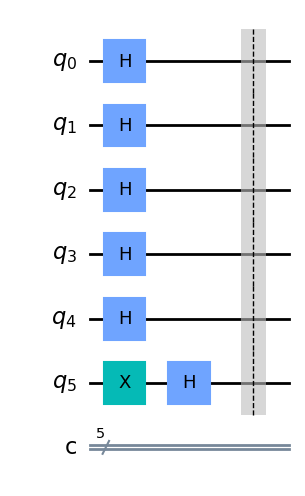

In [8]:
# for x having three bits and y has one bit the quantum circuit has total 4 qubits
secret_number = "10100"

n = len(secret_number) # num. of qubits
def prepare_state(n):
    qc = QuantumCircuit(n+1, n)
    qc.x(n)
    for qubit in range(0,n+1):
        qc.h(qubit)

    return qc
qc = prepare_state(n)
qc.barrier()

display(qc.draw('mpl'))

# Step 2: Apply a quantum oracle (unitary transformation $U_f$) to the circuit: $|x>|y> {\xrightarrow{U_f}} |x>|y{\oplus}f(x)>$

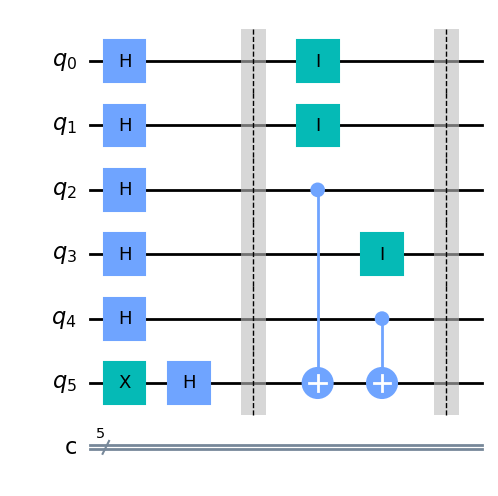

In [9]:
def Oracle(n, qc, qstring):
    for k in range(len(qstring)):
        # pdb.set_trace()
        if qstring[k] == '0':
            qc.i(k)
        # for a 1 we need a cx gate between the corresponding 
        # qubit in x register as source and the y qubit register as target.  
        elif qstring[k] == '1':
            qc.cx(k, n)    
    return qc 

# secret number is reversed because the qiskit indexes the qubit in reverse order, which means
#  the right most qubit is the 0th index qubit and the left most qubit is the higest index qubit
qc = Oracle(n, qc, qstring = secret_number[::-1])
qc.barrier()
display(qc.draw('mpl'))   

# Step 3: Apply hadamard Gates to all qubits in the first register (all qubits holding x)

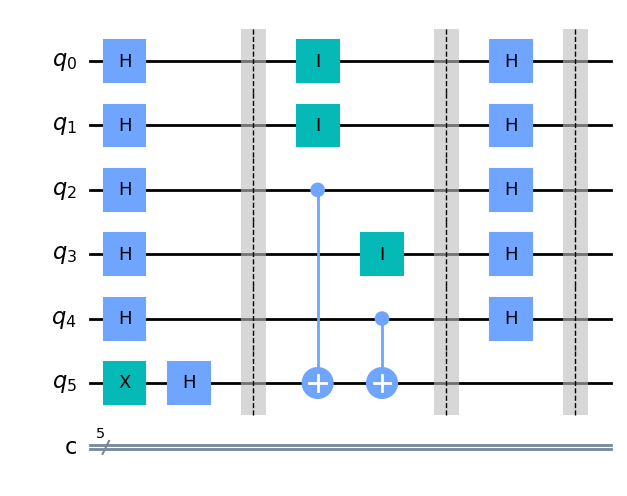

In [10]:
def post_oracle_state(n, qc):
    for qubit in range(n):
        qc.h(qubit)
    return qc

qc = post_oracle_state(n, qc)
qc.barrier()
display(qc.draw('mpl'))     

# Step 4 Measure all qubits in register x. If we get all 0s then we have constant function or else we have balanced function

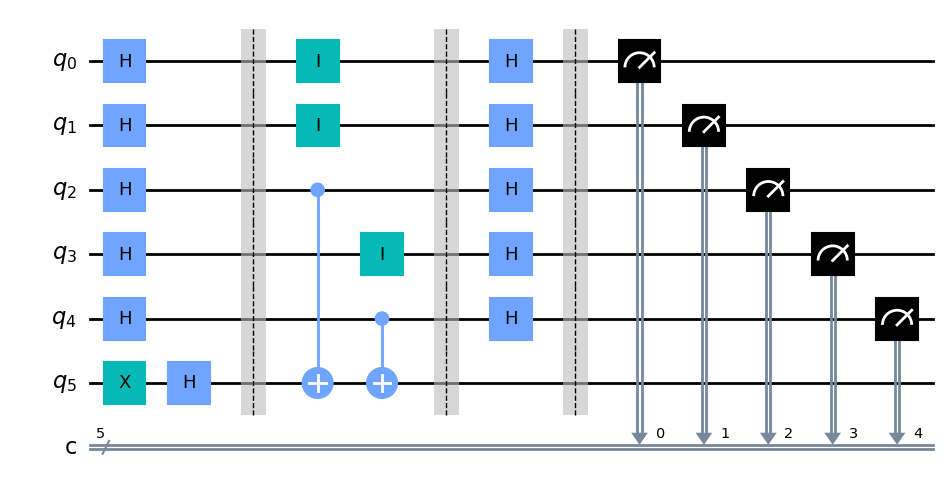

In [11]:
for j in range(n):
    qc.measure(j, j)


display(qc.draw('mpl'))    

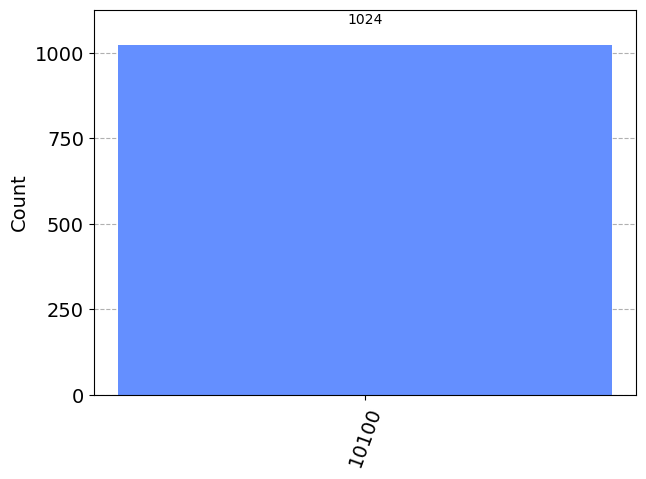

In [13]:
counts = execute(qc, backend = Aer.get_backend('aer_simulator'), shots = 1024).result().get_counts()
plot_histogram(counts)

# Putting it all together

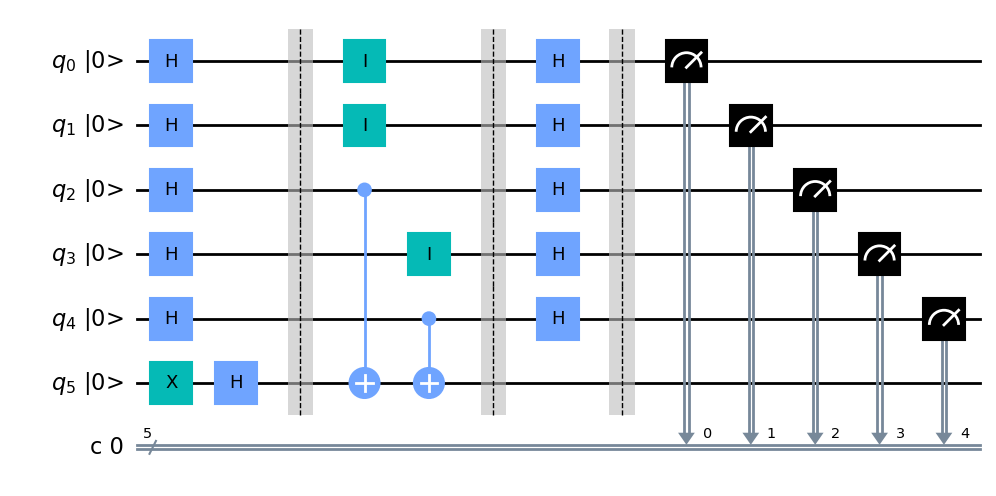

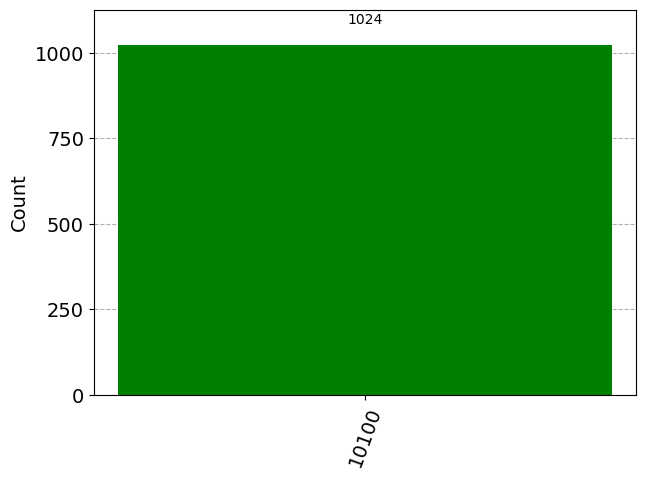

In [22]:
from qiskit import *
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram
import numpy as np


# Step 1
# for x having three bits and y has one bit the quantum circuit has total 4 qubits
secret_number = "10100"

n = len(secret_number) # num. of qubits

def prepare_state(n):
    qc = QuantumCircuit(n+1, n)
    qc.x(n)
    for qubit in range(0,n+1):
        qc.h(qubit)

    return qc
qc = prepare_state(n)
qc.barrier()

# Step 2

def Oracle(n, qc, qstring):
    for k in range(len(qstring)):
        # pdb.set_trace()
        if qstring[k] == '0':
            qc.i(k)
        # for a 1 we need a cx gate between the corresponding 
        # qubit in x register as source and the y qubit register as target.  
        elif qstring[k] == '1':
            qc.cx(k, n)    
    return qc 

qc = Oracle(n, qc, qstring = secret_number[::-1])
qc.barrier()

# Step 3
def post_oracle_state(n, qc):
    for qubit in range(n):
        qc.h(qubit)
    return qc

qc = post_oracle_state(n, qc)
qc.barrier()
# display(qc.draw('mpl'))    

# Step 4 
for j in range(n):
    qc.measure(j, j)
# qc.measure_all()


display(qc.draw('mpl', initial_state=True))
counts = execute(qc, backend = Aer.get_backend('aer_simulator'), shots = 1024).result().get_counts()
plot_histogram(counts, color = 'g')   

# Putting it all together in form of a class for Deutsch -Josza algorithm and executing using Aer simulator

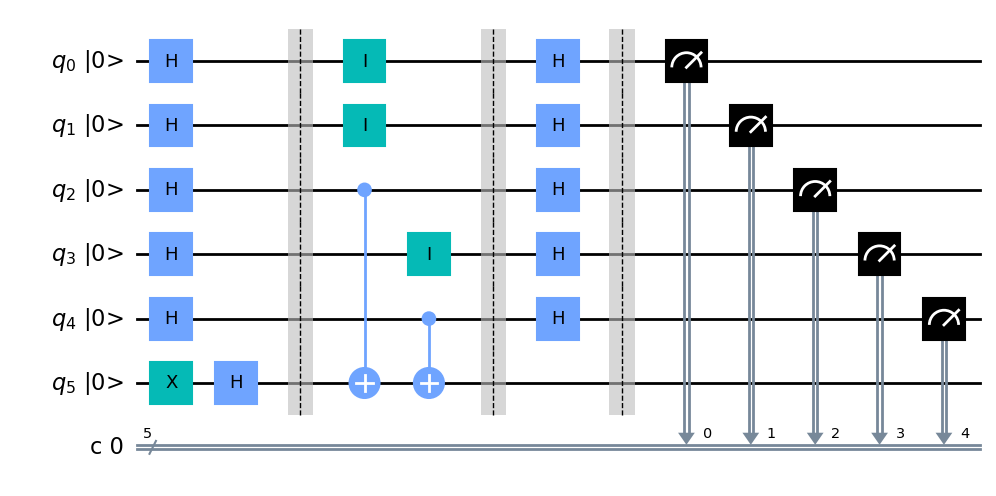

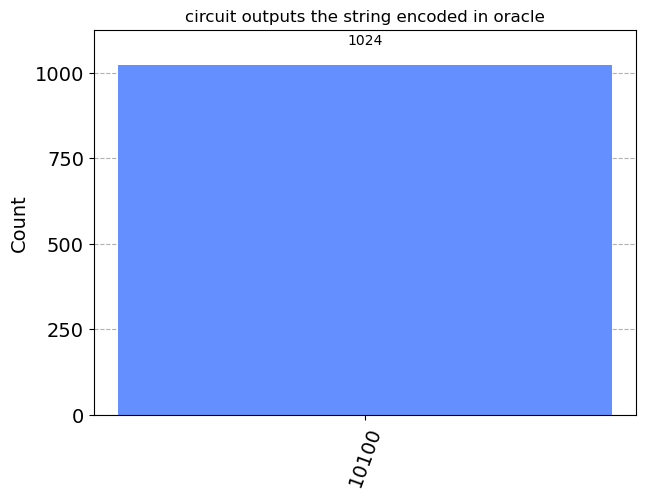

In [49]:
from qiskit import *
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram
import numpy as np


class Deutsch_Josza_Algorithm:
    def __init__(self, n, qstring, shots):
        self.n = n
        self.qc = QuantumCircuit(self.n+1, self.n)
        self.shots = shots
        self.qstring = qstring


    def prepare_state(self):
        self.qc.x(self.n)
        for qubit in range(0,self.n+1):
            self.qc.h(qubit)
        return self.qc
    
    def Oracle(self):
        for k in range(len(self.qstring)):
            # pdb.set_trace()
            if self.qstring[k] == '0':
                self.qc.i(k)
            # for a 1 we need a cx gate between the corresponding 
            # qubit in x register as source and the y qubit register as target.  
            elif self.qstring[k] == '1':
                self.qc.cx(k, n)    
        return self.qc 
    
    def post_oracle_state(self):
        for qubit in range(self.n):
            self.qc.h(qubit)
        return self.qc
    
    def measure_circuit(self):
        for j in range(self.n):
            self.qc.measure(j,j)
        return self.qc
    
    def counts_histogram(self):
        counts = execute(self.qc, backend = Aer.get_backend("aer_simulator"), shots = self.shots).result().get_counts()
        return self.qc, counts


    def execute_circuit(self):
        # Step 1
        self.qc = self.prepare_state()
        self.qc.barrier()

        # Step 2
        self.qc = self.Oracle()
        self.qc.barrier()

        # Step 3
        self.qc = self.post_oracle_state() 
        self.qc.barrier()

        # Step4
        self.qc = self.measure_circuit() 

        # executing the circuit and resturning counts with histogram
        self.qc, counts = self.counts_histogram()

        return self.qc, counts

           

secret_string1 = "10100"
DJ_Circ_balanced = Deutsch_Josza_Algorithm(n=len(secret_string1), qstring=secret_string1[::-1], shots = 1024)
balanced_circ, counts = DJ_Circ_balanced.execute_circuit()
display(balanced_circ.draw('mpl', initial_state=True))
display(plot_histogram(counts, title="circuit outputs the string encoded in oracle"))
